## Task 2 - Average Temperature Dataset

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving data.csv to data.csv


Importing the dataset

In [ ]:
import io
df = pd.read_csv(io.BytesIO(uploaded['data.csv']), skiprows=4)

Locating the missing values and changing them to nan

In [ ]:
df.replace(-99, np.nan, inplace=True)

Interpolating missing values

In [ ]:
df.interpolate(inplace=True)

Convert the 'Date' column to a datetime format

In [ ]:
df['Date'] = pd.to_datetime(df['Date'], format='%Y%m')

Set the 'Date' column as the index


In [ ]:
df.set_index('Date', inplace=True)

In [ ]:
print(df)

            Value  Anomaly
Date                      
1938-04-01   57.6      0.7
1938-05-01   65.7     -1.1
1938-06-01   74.3     -1.8
1938-07-01   81.6      1.4
1938-08-01   82.3      3.9
...           ...      ...
2022-08-01   79.7      1.3
2022-09-01   71.4      0.8
2022-10-01   58.7     -0.8
2022-11-01   47.3      1.6
2022-12-01   35.9      0.9

[1017 rows x 2 columns]


Plot the average temperature time series

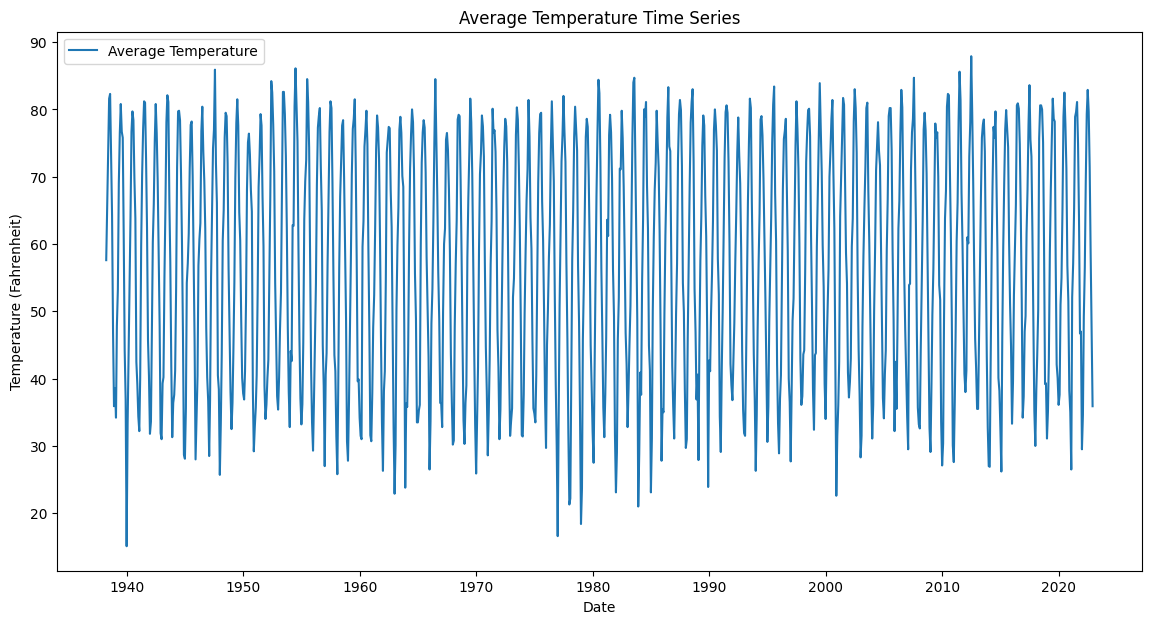

In [ ]:
plt.figure(figsize=(14, 7))
plt.plot(df.index, df['Value'], label='Average Temperature')
plt.title('Average Temperature Time Series')
plt.xlabel('Date')
plt.ylabel('Temperature (Fahrenheit)')
plt.legend()
plt.show()

Plot the corresponding histogram

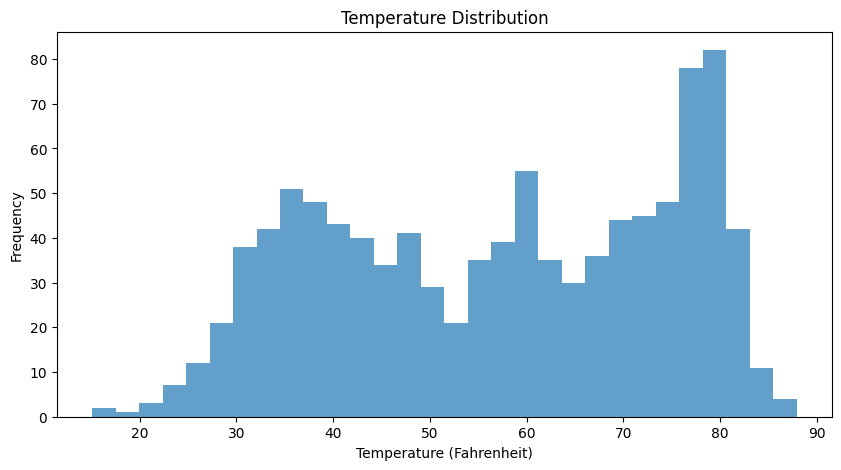

In [ ]:
plt.figure(figsize=(10, 5))
plt.hist(df['Value'], bins=30, alpha=0.7)
plt.title('Temperature Distribution')
plt.xlabel('Temperature (Fahrenheit)')
plt.ylabel('Frequency')
plt.show()

Plot the kernel density plot

<ipython-input-12-9d279f14610a>:1: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df['Value'], shade=True)


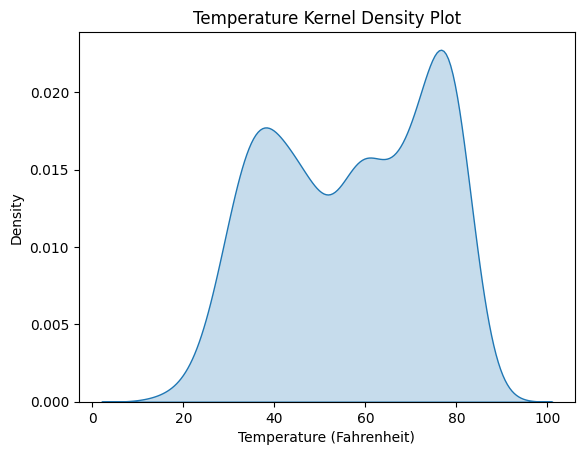

In [ ]:
sns.kdeplot(df['Value'], shade=True)
plt.title('Temperature Kernel Density Plot')
plt.xlabel('Temperature (Fahrenheit)')
plt.show()

Generate descriptive statistics

In [ ]:
descriptive_stats = df['Value'].describe()
print(descriptive_stats)

count    1017.000000
mean       57.118191
std        17.507314
min        15.100000
25%        41.000000
50%        58.800000
75%        73.900000
max        87.900000
Name: Value, dtype: float64


# Where eagles dare additional task

The monthly means don't change for different years, so i created an array with values for each month of the year

In [ ]:
monthly_means = {
    '01': 30.8, '02': 35.6, '03': 45.0, '04': 56.9, '05': 66.8,
    '06': 76.1, '07': 80.2, '08': 78.4, '09': 70.6, '10': 59.5,
    '11': 45.7, '12': 35.0
}

Modifying the table so that it looks more like on the website


In [ ]:
# Index resetting and date conversion
df.reset_index(inplace=True)
df['Date'] = pd.to_datetime(df['Date'])

# Month extraction and monthly mean mapping
df['Month'] = df['Date'].dt.strftime('%m')
df['1901-2000 Monthly Mean'] = df['Month'].map(monthly_means)
df.drop('Month', axis=1, inplace=True)

# Column renaming and date reformatting
df.rename(columns={'Value': 'Average Temperature'}, inplace=True)
df['Date'] = df['Date'].dt.strftime('%B %Y')

# Temperature ranking and column reordering
df['Rank'] = df['Average Temperature'].rank(method='min', ascending=True).astype(int)
df = df[['Date', 'Average Temperature', 'Rank', 'Anomaly', '1901-2000 Monthly Mean']]

print(df)


                Date  Average Temperature  Rank  Anomaly  \
0         April 1938                 57.6   490      0.7   
1           May 1938                 65.7   625     -1.1   
2          June 1938                 74.3   770     -1.8   
3          July 1938                 81.6   984      1.4   
4        August 1938                 82.3   992      3.9   
...              ...                  ...   ...      ...   
1012     August 2022                 79.7   926      1.3   
1013  September 2022                 71.4   718      0.8   
1014    October 2022                 58.7   505     -0.8   
1015   November 2022                 47.3   360      1.6   
1016   December 2022                 35.9   151      0.9   

      1901-2000 Monthly Mean  
0                       56.9  
1                       66.8  
2                       76.1  
3                       80.2  
4                       78.4  
...                      ...  
1012                    78.4  
1013                    70.6  


About the rank column: I'm not entirely sure as to how it works on the website but I assumed that the highest rank goes to the date with the lowest average temperature 😉

# Displaying the table in html!
It was quite fun by the way

In [ ]:
from IPython.display import display, HTML

# Applying formatting and styling
styler = df.style.format({
    'Average Temperature': lambda x: f'{x:.1f}°F',
    'Anomaly': lambda x: f'{x:.1f}°F',
    '1901-2000 Monthly Mean': lambda x: f'{x:.1f}°F'

}).set_table_styles([
    {'selector': 'th, td', 'props': 'width: 150px; text-align: center;'},  # Cell styling
    {'selector': 'th', 'props': 'background-color: #162E51; color: #D7DADC; font-size: 14pt; font-weight: normal; text-align: center;'},  # Header styling
    {'selector': 'td', 'props': 'color: #383838; font-size: 14pt; text-align: center;'},
    {'selector': 'tr:hover', 'props': 'background-color: #BADBDB;'},
    {'selector': 'th, td', 'props': 'border: 1px solid black; padding: 15px 10px;'},  # Border and padding
    {'selector': 'table', 'props': 'border-collapse: collapse;'},  # Table layout
]).apply(lambda x: ['background-color: #DCDEE0' if x.name % 2 else 'background-color: white' for _ in x], axis=1).hide_index()  # Making every second row light gray

# Rendering the table as HTML
html_table = styler.set_table_attributes('style="width:100%; border-collapse: collapse;"').render()

# Saving the styled table to an HTML file
with open('styled_temperature_data_table.html', 'w') as f:
    f.write(html_table)

# Displaying the styled table
display(HTML(html_table))


<ipython-input-16-455d9429c7ca>:16: FutureWarning: this method is deprecated in favour of `Styler.hide(axis="index")`
  ]).apply(lambda x: ['background-color: #DCDEE0' if x.name % 2 else 'background-color: white' for _ in x], axis=1).hide_index()  # Making every second row light gray
<ipython-input-16-455d9429c7ca>:19: FutureWarning: this method is deprecated in favour of `Styler.to_html()`
  html_table = styler.set_table_attributes('style="width:100%; border-collapse: collapse;"').render()


Date,Average Temperature,Rank,Anomaly,1901-2000 Monthly Mean
April 1938,57.6°F,490,0.7°F,56.9°F
May 1938,65.7°F,625,-1.1°F,66.8°F
June 1938,74.3°F,770,-1.8°F,76.1°F
July 1938,81.6°F,984,1.4°F,80.2°F
August 1938,82.3°F,992,3.9°F,78.4°F
September 1938,72.7°F,743,2.1°F,70.6°F
October 1938,64.3°F,609,4.8°F,59.5°F
November 1938,46.9°F,347,1.2°F,45.7°F
December 1938,35.9°F,151,0.9°F,35.0°F
January 1939,38.6°F,209,7.8°F,30.8°F
